##### CIS 242

## Spring 2020

## HOMEWORK ASSIGNMENT 7


Please compile your responses use markdown in your Jupyter notebook to answer the questions.  If you prefer, you may also submit a Word or PDF document with the responses along the PDF or HTML version of the completed notebook.   

#### Active notebooks (.ipynb files) or raw code (.py files) will NOT be accepted and no points will be given.

The code part of the files will not be graded, but they will be checked if necessary to verify your findings and recommendations. Point deductions may occur if there are major discrepancies between your written answers and the output from the code. 

Please organize your notebook to have the homework responses at the top and the working code underneath.

Questions are worth 2 points each for a total of **26 points**.  

## Working with movie reviews 

You have been hired by a new streaming service to try to decide which movies they should bid for to get exclusive rights before Netflix gets them.  You have access to user reviews from the test screenings that the studios do.  

There are positive and negative reviews for each movie.  You want to be able to predict the rating of a movie based on user reviews so you can help your new company know how to predict "good" movies based on review terms.  You have a data file movie_reviews.csv to work with.

#### 1.  Read in the reviews and do some EDA.  What can you say about the data?  Create an unconstrained vector space.  How many features do you have?

In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_colwidth', 150000)
pd.set_option('display.max_columns', 999)

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.feature_extraction.text import CountVectorizer
import math
#setup code borrowed from Professor Cannon's Lecture_7.zip

In [2]:
#Inspecting data
full_corpus = pd.read_csv('movie_reviews.csv', sep='\t', header=None, names=['label', 'msg_body'])
print("Input data has {} rows and {} columns".format(len(full_corpus), len(full_corpus.columns)))
#setup code borrowed from Professor Cannon's Lecture_7.zip

Input data has 25001 rows and 2 columns


The raw data file 'movie_reviews.csv' has 25,000 rows (25,001-1 because first row is header) and 3 columns (2+1 because first column index is treated as 0).

In [3]:
movies = pd.read_csv('movie_reviews.csv')
m = []
for index, rows in movies.iterrows():
    m.append(rows[2])
#reading in just the 'Reviews' column to vectorize values
#code borrowed from https://www.geeksforgeeks.org/create-a-list-from-rows-in-pandas-dataframe/

In [4]:
vec = CountVectorizer(binary=False)

movies_vec = vec.fit_transform(m)
print(type(movies_vec))
print(movies_vec.shape)
#code borrowed from Professor Cannon's Lecture_7.zip

<class 'scipy.sparse.csr.csr_matrix'>
(25000, 74899)


There are 25,000 rows and 74,899 features in an uncontrained vector space. Some features are numeric while others are a mixture of number and letters or simply just letters/words.

#### 2.  What are the top 20 words in the feature space?

In [5]:
names = vec.get_feature_names()   #create list of feature names
print(type(names), len(names))
count = np.sum(movies_vec.toarray(), axis = 0) # add up feature counts 
count2 = count.tolist()  # convert numpy array to list
count_df = pd.DataFrame(count2, index = names, columns = ['count']) # create a dataframe from the list
#code borrowed from Professor Cannon's Lecture_7.zip 

top20_words = count_df.sort_values('count', ascending = False)
print(top20_words.head(20))
#code borrowed from https://cmdlinetips.com/2018/02/how-to-sort-pandas-dataframe-by-columns-and-row/

<class 'list'> 74899
        count
the    330651
and    159989
of     143294
to     132191
is     103575
it      94236
in      92646
this    74884
that    70462
was     47353
as      44720
movie   43880
with    43153
for     43040
but     40877
film    39477
you     34816
on      33811
not     30075
are     28917


The top 20 most common words in the feature space without any restrictions are unsurprisingly mostly filler/stop words as shown above, with a few exceptions that are related to the film industry such as 'movie' and 'film'.

#### 3.  Create a feature space that removes stopwords.  What is the size of the space now?  What are the top words?

In [6]:
vec2 = CountVectorizer(binary=False, stop_words='english')

movies_vec2 = vec2.fit_transform(m)
print(movies_vec2.shape)

(25000, 74588)


With the stop words removed, the number of features went down from 74,899 to 74,588.

In [7]:
names = vec2.get_feature_names()   #create list of feature names
print(type(names), len(names))
count = np.sum(movies_vec2.toarray(), axis = 0) # add up feature counts 
count2 = count.tolist()  # convert numpy array to list
count_df = pd.DataFrame(count2, index = names, columns = ['count']) # create a dataframe from the list
#code borrowed from Professor Cannon's Lecture_7.zip 

top20_words = count_df.sort_values('count', ascending = False)
print(top20_words.head(20))
#code borrowed from https://cmdlinetips.com/2018/02/how-to-sort-pandas-dataframe-by-columns-and-row/

<class 'list'> 74588
            count
movie       43880
film        39477
like        19869
just        17387
time        12364
really      11346
story       11103
people       8891
don          8769
make         7851
movies       7630
way          7600
characters   7282
think        7037
watch        6968
films        6856
character    6850
seen         6687
love         6547
plot         6388


With the stop words removed, the top 20 most common words are more context related as shown in the list above.

#### 4.  Create a feature space that requires a minimum frequency for a term as well as removing stopwords.  What limit will you choose?  Why?  What is the effect on the feature space? 

In [8]:
vec3 = CountVectorizer(binary=False, stop_words='english', min_df=.05)

movies_vec3 = vec3.fit_transform(m)
print(movies_vec3.shape)

(25000, 239)


I set the minimum frequency as 0.05, which means words that appear less than 5% of the time in the entire document are ignored. The reason why I chose 5% is because it is reasonable to assume that out of 100 words, a non-stop word that appears less than 5 times is likely to be irrelevant to the context. This change had a significant effect on the feature space, reducing the number of words from 74,588 to 239.

#### 5. Investigate this feature space.  What tokens would you like to remove that remain?  Why? (Or Why not?)

In [9]:
names = vec3.get_feature_names()   #create list of feature names
print(type(names), len(names))
count = np.sum(movies_vec3.toarray(), axis = 0) # add up feature counts 
count2 = count.tolist()  # convert numpy array to list
count_df = pd.DataFrame(count2, index = names, columns = ['count']) # create a dataframe from the list
#code borrowed from Professor Cannon's Lecture_7.zip 

bottom20_words = count_df.sort_values('count')
print(bottom20_words.head(20))
#code borrowed from https://cmdlinetips.com/2018/02/how-to-sort-pandas-dataframe-by-columns-and-row/

<class 'list'> 239
              count
beginning      1374
entire         1395
overall        1424
liked          1427
stars          1430
based          1430
totally        1432
finally        1464
yes            1464
hope           1464
sort           1465
case           1468
called         1479
gives          1484
written        1489
entertaining   1493
loved          1497
title          1501
certainly      1504
absolutely     1506


From this list of 20 least common words, I would like to remove 'beginning', 'entire', 'based', 'totally', 'finally', 'yes', 'hope', 'sort', 'case', 'called', 'written', 'title', 'certainly', and 'absolutely' as they do not reveal any viewer sentiment (whether negative or positive).

#### 6. Create custom stopword list to remove the tokens.  How does this affect your feature space?  

In [10]:
from sklearn.feature_extraction import text 
skl_stopwords = list(text.ENGLISH_STOP_WORDS)

In [11]:
my_stopwords = skl_stopwords + ['beginning', 'entire', 'based', 'totally', 'finally', 'yes', 'hope', 'sort', 'case', 
                                'called', 'written', 'title', 'certainly','absolutely']

vec4 = CountVectorizer(binary=False, stop_words=my_stopwords, min_df=.05)

movies_vec4 = vec4.fit_transform(m)
print(type(movies_vec4))
print(movies_vec4.shape)

<class 'scipy.sparse.csr.csr_matrix'>
(25000, 225)


14 words were added to the list of stopwords. Out of 239 remaining words, 14 words were removed and brought the number of tokens down to 225.

In [12]:
pd.DataFrame(movies_vec4.toarray(),columns = vec4.get_feature_names()).head(5)

,10,acting,action,actor,actors,actually,american,audience,away,beautiful,believe,better,big,bit,black,book,budget,came,camera,cast,character,characters,classic,come,comedy,comes,completely,couldn,couple,course,day,dead,death,definitely,dialogue,did,didn,different,director,does,doesn,doing,don,dvd,early,effects,end,ending,enjoy,entertaining,especially,face,fact,family,fan,far,feel,film,films,friend,friends,fun,funny,gets,getting,girl,given,gives,goes,going,got,guy,half,hard,having,head,help,high,hollywood,home,horror,house,human,idea,instead,interesting,isn,job,john,just,kids,kind,know,later,laugh,left,let,life,like,liked,line,lines,little,ll,long,look,looking,looks,lot,love,loved,low,main,make,makes,making,man,maybe,mean,men,mind,minutes,moments,money,movie,movies,music,need,new,nice,night,oh,old,original,overall,people,perfect,performance,performances,person,piece,place,play,played,playing,plays,plot,point,poor,pretty,probably,production,quite,read,real,really,reason,recommend,remember,rest,right,role,said,saw,say,scene,scenes,school,screen,script,second,seeing,seen,sense,series,set,short,shot,shows,simply,small,special,star,stars,start,story,style,sure,takes,tell,thing,things,think,thought,time,times,true,truly,try,trying,tv,understand,use,used,ve,version,video,want,war,wasn,watch,watched,watching,way,went,wife,woman,won,work,world,worth,wrong,year,years,young
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,2,0,2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,2,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,8,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,0,0,1,2,0,0,0,1,6,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,2,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,4,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,2,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


#### 7. Investigate the feature space further.  What other changes you would like to make?  Choose custom dictionary replacement or stemming and implement your choice.  How does that affect your feature space now?

In [13]:
from nltk.stem.porter import PorterStemmer

testlist = ['act','character','come','did','do','film','friend','fun','get','give','go','like','line','look','love','make',
           'movie','performance','play','real','scene','see','star','thing','time','try','use','watch','year']
ps = PorterStemmer()
print((testlist))
test_stem = [ps.stem(word) for word in testlist]
test_stem
#code borrowed from Professor Cannon's Lecture_7.zip 

['act', 'character', 'come', 'did', 'do', 'film', 'friend', 'fun', 'get', 'give', 'go', 'like', 'line', 'look', 'love', 'make', 'movie', 'performance', 'play', 'real', 'scene', 'see', 'star', 'thing', 'time', 'try', 'use', 'watch', 'year']


['act',
 'charact',
 'come',
 'did',
 'do',
 'film',
 'friend',
 'fun',
 'get',
 'give',
 'go',
 'like',
 'line',
 'look',
 'love',
 'make',
 'movi',
 'perform',
 'play',
 'real',
 'scene',
 'see',
 'star',
 'thing',
 'time',
 'tri',
 'use',
 'watch',
 'year']

We will now use the Porter Stemmer to stem the words in the movie reviews to see if it further affects the feature space.

In [14]:
reviews_stem = [ps.stem(word) for word in m]
ps_reviews = vec4.fit_transform(reviews_stem)
print(ps_reviews.shape)
#code borrowed from Professor Cannon's Lecture_7.zip 

(25000, 225)


In [15]:
names = vec4.get_feature_names()  
count = np.sum(ps_reviews.toarray(), axis = 0) 
count2 = count.tolist()  
count_df = pd.DataFrame(count2, index = names, columns = ['count']) 
count_df.sort_values(['count'], ascending = False)[0:20]
#code borrowed from Professor Cannon's Lecture_7.zip 

,count
movie,43855
film,39483
like,19869
just,17387
time,12354
really,11345
story,11101
people,8890
don,8771
make,7851


Stemming the words in the movie reviews surprisingly did not change the feature space.

#### 8. Choose the feature space you think most appropriate to use in a model.  Now we want to use this predict the audience feeling for a movie.  How will you do that?  Describe your target variable.  How will you impliment this?

The top 20 most common words in the reviews remain the same regardless of stemming, so I will be using vec4 feature space that not only removes stop words, but also removes words that do not reveal any viewer sentiment. This feature space also excludes words with less than 5% frequency in the entire document. 'Rating' will be the target variable.

#### 9. Train at least two classification models using your feature space.  Which had the highest predictive accuracy? What did it do well?  Not so well?

In [16]:
X = movies_vec4.toarray()
#setting numerical value, rating, as target variable.
y = movies['Rating'].values

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
#code borrowed from Professor Cannon's Lecture_7.zip

(20000, 225)
(5000, 225)
(20000,)
(5000,)


Multinomial NB Model:

In [18]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

model = MultinomialNB()
model.fit(X_train, y_train)

NBnews_predicted = model.predict(X_test)
#code borrowed from Professor Cannon's Lecture_7.zip

In [19]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [20]:
def create_cm(t1, t2):
    cm = confusion_matrix(t1, t2)
    plt.matshow(cm)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    print(cm)
#code borrowed from Professor Cannon's Lecture_7.zip 

0.3352
              precision    recall  f1-score   support

           1       0.40      0.64      0.49      1033
           2       0.18      0.07      0.11       459
           3       0.19      0.12      0.15       512
           4       0.25      0.20      0.22       511
           7       0.23      0.20      0.21       459
           8       0.21      0.19      0.20       535
           9       0.17      0.07      0.10       459
          10       0.43      0.57      0.49      1032

    accuracy                           0.34      5000
   macro avg       0.26      0.26      0.25      5000
weighted avg       0.29      0.34      0.30      5000



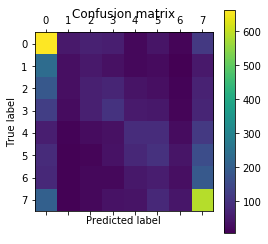

[[662  50  67  62  19  43  14 116]
 [237  34  51  36  19  25   6  51]
 [186  33  64  74  40  32  13  70]
 [127  28  64 103  53  47  16  73]
 [ 61  12  29  36  90  89  27 115]
 [ 86  11  15  39  79 100  43 162]
 [ 81  10  19  21  47  59  34 188]
 [207  10  21  37  41  81  46 589]]


In [21]:
print(model.score(X_test, y_test))
print(classification_report(y_test, NBnews_predicted))
create_cm(y_test, NBnews_predicted)
#code borrowed from Professor Cannon's Lecture_7.zip 

The overall precision score turns out to be 0.3352. The multinomial NB model yields a decent recall rate for movies rated 1 or 10, but performs very poorly in predicting the rating for movies between 1 and 10. I elaborate more on question 10 as to why I focus on recall rates than the overall precision rates.

Decision Tree Model:

In [22]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state = 42)
model.fit(X_train, y_train)

clf1_expected = y_test
clf1_predicted = model.predict(X_test)
#code borrowed from Professor Cannon's Lecture_7.zip

0.2082
              precision    recall  f1-score   support

           1       0.34      0.33      0.33      1033
           2       0.13      0.12      0.13       459
           3       0.15      0.15      0.15       512
           4       0.12      0.13      0.12       511
           7       0.10      0.10      0.10       459
           8       0.13      0.13      0.13       535
           9       0.13      0.12      0.13       459
          10       0.32      0.32      0.32      1032

    accuracy                           0.21      5000
   macro avg       0.18      0.18      0.18      5000
weighted avg       0.21      0.21      0.21      5000



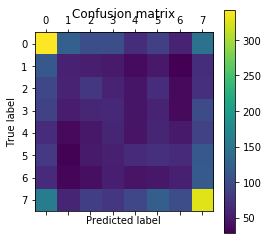

[[342 124 104 103  69  88  58 145]
 [114  57  54  51  37  49  28  69]
 [ 95  58  79  58  46  68  36  72]
 [ 90  53  62  64  46  59  36 101]
 [ 68  36  48  60  45  61  51  90]
 [ 80  30  51  56  66  71  66 115]
 [ 65  33  41  54  45  48  56 117]
 [160  61  86  78  95 123 102 327]]


In [23]:
print(model.score(X_test, y_test))
print(classification_report(clf1_expected, clf1_predicted))
create_cm(clf1_expected, clf1_predicted)
#code borrowed from Professor Cannon's Lecture_7.zip 

The overall precision score turns out to be 0.2082. The decision tree model performs the worst, presumably due to the fact that the model treats all the variables as binary variables and there are too many variables for the decision tree model to take into account.

Log Regression Model:

In [24]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state = 42, max_iter = 1000)
model.fit(X_train, y_train)

# make predictions
clf3_expected = y_test
clf3_predicted = model.predict(X_test)
#code borrowed from Professor Cannon's Lecture_7.zip

0.347
              precision    recall  f1-score   support

           1       0.40      0.68      0.50      1033
           2       0.17      0.04      0.07       459
           3       0.22      0.11      0.14       512
           4       0.24      0.17      0.20       511
           7       0.26      0.15      0.19       459
           8       0.23      0.15      0.18       535
           9       0.23      0.05      0.08       459
          10       0.39      0.68      0.50      1032

    accuracy                           0.35      5000
   macro avg       0.27      0.25      0.23      5000
weighted avg       0.29      0.35      0.29      5000



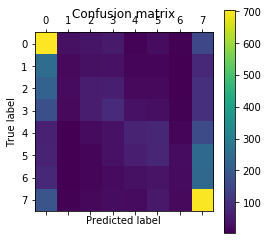

[[703  35  43  53   9  27   8 155]
 [254  20  34  36  15  12   4  84]
 [223  24  55  63  22  21   4 100]
 [174  21  55  86  37  33   6  99]
 [ 66   5  24  37  70  78  12 167]
 [ 73   3  14  37  62  78  25 243]
 [ 85   4  12  24  34  41  23 236]
 [188   7  17  25  23  52  20 700]]


In [25]:
print(model.score(X_test, y_test))
print(classification_report(clf3_expected, clf3_predicted))
create_cm(clf3_expected, clf3_predicted)
#code borrowed from Professor Cannon's Lecture_7.zip

The overall precision score turns out to be 0.347. Again, the log regression model yields the highest "predictive accuracy". The log regression model especially does better than the multinomial NB model and the decision tree model when it comes to correctly predicting the actual values of movies with ratings 1 or 10. However, it does very poorly with movies rated between those 1 and 10 just like the other two models.

#### 10. What is the appropriate metric for evaluating these models?  Why? How did your previous models do when using that measure?

I think the appropriate metric would be using the recall values of movies that were rated 1 (worst) and 10 (best) to know which movies to abosultely reject or bid for. As mentioned in my HW 6 submission, "the precision rate represents the rate of correctly predicted data points out of all the positive predictions made. This means ultimately, precision rate only concerns with predicted values, whereas the recall rate is based on the actual cases that were positive. This also suggests that if the predictive model is completely off and we predict a vast majority correctly out of all the positive predictions, we could be getting a high precision rate even if the model is inaccruate." As we can see in the models above, the recall rates for movies rated 1 and 10 are highest across all three models. We might be able to increase these values by increasing the number of tokens used for prediction, as the models are only given 225 tokens in the feature space.

#### 11. Create an alternative feature space.  You can change any aspect.  Run your models on this feature space.  Does it improve your model's performance for your chosen metric? 

This time, we are going to change the minimum frequency setting to .001 to provide more tokens in the feature space for the model to use and provide more precise predictions.

In [26]:
vec5 = CountVectorizer(binary=False, stop_words=my_stopwords, min_df=.001)

reviews_stem = [ps.stem(word) for word in m]
ps_reviews = vec5.fit_transform(reviews_stem)
print(ps_reviews.shape)

(25000, 9867)


In [27]:
#we now have 9,867 tokens to use instead of 225
X = ps_reviews.toarray()
y = movies['Rating'].values

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(20000, 9867)
(5000, 9867)
(20000,)
(5000,)


Multinomial NB Model:

In [29]:
model = MultinomialNB()
model.fit(X_train, y_train)

NBnews_predicted = model.predict(X_test)

0.389
              precision    recall  f1-score   support

           1       0.50      0.66      0.57      1033
           2       0.24      0.19      0.21       459
           3       0.25      0.21      0.22       512
           4       0.30      0.26      0.28       511
           7       0.27      0.25      0.26       459
           8       0.27      0.22      0.24       535
           9       0.24      0.23      0.23       459
          10       0.55      0.58      0.56      1032

    accuracy                           0.39      5000
   macro avg       0.33      0.32      0.32      5000
weighted avg       0.37      0.39      0.38      5000



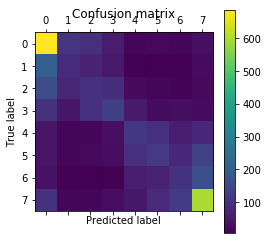

[[686 108  98  56  16  19  17  33]
 [208  87  71  51   8   5   5  24]
 [165  77 105  94  22  14  12  23]
 [101  46  96 131  55  26  30  26]
 [ 40  14  17  34 115  96  59  84]
 [ 40  14  20  28  99 117  81 136]
 [ 37   8   5   9  56  68 104 172]
 [106  16  16  28  50  90 126 600]]


In [30]:
print(model.score(X_test, y_test))
print(classification_report(y_test, NBnews_predicted))
create_cm(y_test, NBnews_predicted)

I decided to abandon the Decision Tree Model because it performed the worst out of the three models and it took too long for the model to process 9,867 variables. <br/>
Log Regression Model:

In [31]:
model = LogisticRegression(random_state = 42, max_iter = 1000)
model.fit(X_train, y_train)

clf3_expected = y_test
clf3_predicted = model.predict(X_test)

0.365
              precision    recall  f1-score   support

           1       0.54      0.56      0.55      1033
           2       0.21      0.19      0.20       459
           3       0.24      0.23      0.24       512
           4       0.27      0.25      0.26       511
           7       0.28      0.27      0.27       459
           8       0.25      0.26      0.25       535
           9       0.19      0.18      0.18       459
          10       0.52      0.55      0.53      1032

    accuracy                           0.36      5000
   macro avg       0.31      0.31      0.31      5000
weighted avg       0.36      0.36      0.36      5000



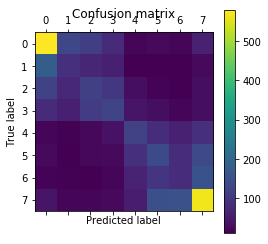

[[579 132 117  78  19  25  20  63]
 [178  88  72  60  12  13  11  25]
 [122  75 119 104  32  16  13  31]
 [ 81  62 111 128  43  33  20  33]
 [ 21  14  24  39 123  85  63  90]
 [ 25  12  24  26  90 138  83 137]
 [ 17  14  11  18  67  96  83 153]
 [ 44  19  20  26  55 149 152 567]]


In [32]:
print(model.score(X_test, y_test))
print(classification_report(clf3_expected, clf3_predicted))
create_cm(clf3_expected, clf3_predicted)

While the overall precision score increased for both models with the new feature space (0.3352 to 0.389 for Multinomial NB and 0.347 to 0.365 for Log Regression), the recall rate only increased in the Multinomial NB model, which is still less than the previous recall rates of the Log Regression model.

#### 12.  Using the "best" feature space, try to improve on your model's performance.  What model/parameter settings do you think will help?  What is the result?

We'll try to boost the multinomial NB model using the vec4 feature space and see if that helps with increasing the recall rates.

In [41]:
#Let's try a boosted NB model using vec4 feature space.
X = movies_vec4.toarray()
y = movies['Rating'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

from sklearn.ensemble import AdaBoostClassifier
NBboost = AdaBoostClassifier(MultinomialNB(),n_estimators=200)
NBboost.fit(X_train, y_train)
clf3_predicted = NBboost.predict(X_test)

accuracy: 0.3396
              precision    recall  f1-score   support

           1       0.41      0.66      0.51      1033
           2       0.16      0.06      0.09       459
           3       0.22      0.13      0.16       512
           4       0.26      0.16      0.20       511
           7       0.23      0.14      0.17       459
           8       0.22      0.16      0.18       535
           9       0.15      0.06      0.08       459
          10       0.39      0.64      0.48      1032

    accuracy                           0.34      5000
   macro avg       0.26      0.25      0.24      5000
weighted avg       0.29      0.34      0.29      5000



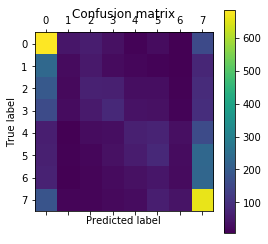

[[684  47  60  36  12  28   8 158]
 [236  27  52  27  17  13   7  80]
 [196  22  67  66  30  31  10  90]
 [162  28  55  84  39  37  12  94]
 [ 62   6  29  30  65  73  33 161]
 [ 66  11  18  36  58  84  29 233]
 [ 70   7  16  25  36  48  26 231]
 [183  16  14  23  28  64  43 661]]


In [42]:
print("accuracy: " + str(accuracy_score(y_test, clf3_predicted)))
print(classification_report(y_test, clf3_predicted))
create_cm(y_test, clf3_predicted)

Boosting the multinomial NB model slightly increased the overall precision from 0.3352 to 0.3396 and recall rate for movies that were rate 1(0.64 to 0.66) and 10(0.57 to 0.64).

#### 13.  Are you able to build a model that will help your streaming service get some market share?  Why or why not?

I am able to build a model that can help the company identify which movies they definitely want to bid for and the ones they do not want to bid for, but I cannot necessarily say that the model can help the company get more market share because the model is not very good at predicting ratings for movies that fall between 1 and 10. However, the company could use this model to prioritize movies to bid for early in the stage to get a competitive head start and they could also use the model to identify movies to not consider. This could help them save time and resources by using them more efficiently.

#### Extra credit (2 points): What terms from the reviews are most strongly related to a movies classification?  How do you know this?

Based on the vec4 feature space, words such as 'like' and 'love' were among the top 20 most common words. Because I removed words that did not reveal any viewer sentiment in this feature space, which is why it only has 225 tokens, I would speculate that these words are most stronlgy related to a movies classification because each token is treated like a data point to connect the frequency of a given word with a movie's numerical rating.

## Working code below

All working code is shown under each question.